In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df.shape

(100, 4)

In [11]:
df=df.iloc[:,1:]

In [13]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [15]:
import matplotlib.pyplot as plt

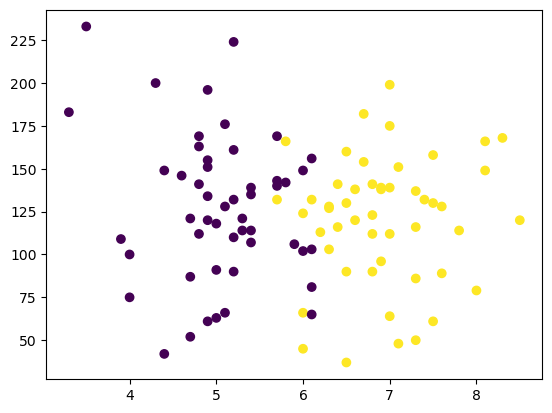

In [21]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [23]:
x=df.iloc[:,0:2]

In [41]:
y=df.iloc[:,-1]

In [33]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [43]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [45]:
y.shape

(100,)

In [49]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [55]:
x_train

,cgpa,iq
42,7.6,89.0
12,5.4,139.0
78,6.1,81.0
65,8.1,166.0
63,6.3,128.0
...,...,...
93,6.8,112.0
91,7.5,158.0
35,6.8,90.0
22,4.9,120.0


In [81]:
x_test

array([[-0.75833522,  1.79344439],
       [ 0.08425947,  0.67383749],
       [-1.22644339, -1.39950863],
       [ 0.7396109 ,  1.04703979],
       [-0.94557849, -1.19217402],
       [-1.60092992, -0.19696788],
       [ 1.20771906,  0.05183365],
       [ 1.30134069, -1.27510786],
       [ 0.458746  ,  0.07256711],
       [ 0.7396109 ,  0.42503595]])

In [57]:
y_test

80    0
4     0
96    0
38    1
94    0
18    0
29    1
5     1
99    1
57    1
Name: placement, dtype: int64

In [61]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler=StandardScaler()

In [65]:
x_train=scaler.fit_transform(x_train)

In [67]:
x_train

array([[ 1.38264765, -0.94203305],
       [-0.54526949,  0.3611175 ],
       [ 0.06815869, -1.15053714],
       [ 1.82081063,  1.06481879],
       [ 0.24342388,  0.07442438],
       [ 1.11974985, -0.23833176],
       [-0.98343248, -1.67179736],
       [-0.63290209, -0.1080167 ],
       [-0.54526949,  0.25686545],
       [ 0.24342388, -0.5771509 ],
       [-2.38555404,  1.50788998],
       [-0.98343248,  0.77812567],
       [ 0.06815869,  0.17867642],
       [-0.2823717 ,  0.38718051],
       [-0.2823717 ,  0.17867642],
       [-0.2823717 ,  1.14300783],
       [ 0.06815869, -0.5771509 ],
       [-0.54526949, -0.47289886],
       [-0.01947391, -1.54148231],
       [ 0.68158687,  0.41324352],
       [-1.07106508, -0.3425838 ],
       [-0.72053469, -0.91597004],
       [ 1.29501505,  0.1265504 ],
       [ 0.06815869,  0.80418868],
       [-0.89579988, -1.61967134],
       [-0.72053469,  2.57647343],
       [ 0.59395427,  0.75206266],
       [ 0.59395427,  1.48182697],
       [-0.98343248,

In [69]:
x_test=scaler.fit_transform(x_test)

In [71]:
x_test

array([[-0.75833522,  1.79344439],
       [ 0.08425947,  0.67383749],
       [-1.22644339, -1.39950863],
       [ 0.7396109 ,  1.04703979],
       [-0.94557849, -1.19217402],
       [-1.60092992, -0.19696788],
       [ 1.20771906,  0.05183365],
       [ 1.30134069, -1.27510786],
       [ 0.458746  ,  0.07256711],
       [ 0.7396109 ,  0.42503595]])

In [73]:
from sklearn.linear_model import LogisticRegression

In [75]:
clf=LogisticRegression()

In [83]:
#model tranning
clf.fit(x_train,y_train)

LogisticRegression()

In [97]:
y_pred=clf.predict(x_test)

In [99]:
y_test

80    0
4     0
96    0
38    1
94    0
18    0
29    1
5     1
99    1
57    1
Name: placement, dtype: int64

In [101]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_test,y_pred)

0.9

In [113]:

!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.4 MB 6.3 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.6 MB/s eta 0:00:00


<Axes: >

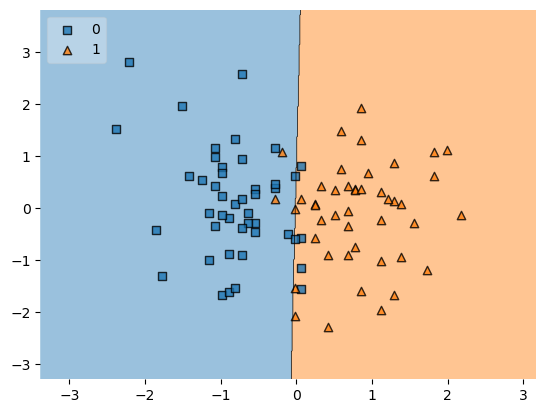

In [119]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [121]:
import pickle

In [125]:
pickle.dump(clf,open('model.pkl','wb'))